In [1]:
# 1. 기본 라이브러리 불러오기
import cv2 # computer vision
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm

In [2]:
# 2. 일반화 된 유사 연산자 함수 정의하기
def HomogeneityOperator(inp,n):
    k = np.uint8((n-1)/2)
    h,w = inp.shape
    
    inp_pad = np.zeros((h+2*k, w+2*k))
    inp_pad[k:h+k,k:w+k] = inp
    
    out = np.zeros((h+2*k, w+2*k))
    for i in range(k,h+k):
        for j in range(k,w+k):
            temp = inp_pad[i-k:i+k+1,j-k:j+k+1]
            out[i,j] = np.max(np.abs([temp[1,1]-temp[0,0],\
                                     temp[1,1]-temp[0,1],\
                                     temp[1,1]-temp[0,2],\
                                     temp[1,1]-temp[1,0],\
                                     temp[1,1]-temp[1,2],\
                                     temp[1,1]-temp[2,0],\
                                     temp[1,1]-temp[2,1],\
                                     temp[1,1]-temp[2,2]]))
    out = np.uint8(out[k:h+k,k:w+k])
    return out

In [3]:
# define user parameters
n = 3
threshold1 = 48
threshold2 = 192

In [4]:
# 3. ‘chip.jpg’를 흑백영상(inp)으로 불러오고, 유사 연산자에 적용하기(out)
inp = cv2.imread('images/chip.jpg', cv2.IMREAD_GRAYSCALE)
h,w = inp.shape
out = HomogeneityOperator(inp,n)

In [11]:
# 4. 3번에서 구한 out에 임계값을 적용하기
# 4-1) single threshold
out1 = np.zeros((h,w))
out1[np.where(out>threshold1)] = 255
print(out1)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [12]:
# 4-2) multiple threshold
out2 = np.zeros((h,w))
out2[np.where(out>threshold2)] = 255
out2[np.where(out<threshold2)] = 128
out2[np.where(out<threshold1)] = 0
print(out2)

[[128. 128. 128. ... 255. 255. 255.]
 [128.   0.   0. ...   0.   0. 255.]
 [128.   0.   0. ...   0.   0. 128.]
 ...
 [128.   0.   0. ...   0.   0. 128.]
 [128.   0.   0. ...   0.   0. 128.]
 [128. 128. 128. ... 128. 128. 128.]]


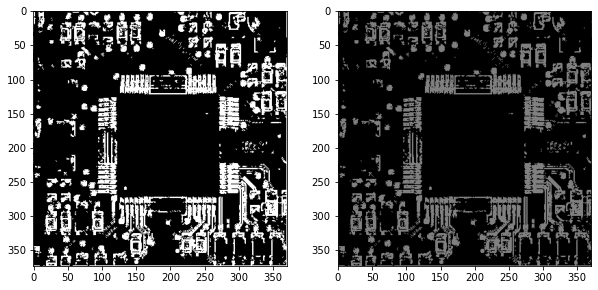

In [14]:
# 5. 결과 출력하기
plt.figure(figsize=(10,10))
plt.subplot(1,2,1); plt.imshow(out1, cmap='gray');
plt.subplot(1,2,2); plt.imshow(out2, cmap='gray');